# Функции в Pandas
Примеры из презентации

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [3]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

,user_id,clicks,orders,calculated
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [4]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [5]:
df.orders.apply(watcher)

0    False
1    False
2     True
Name: orders, dtype: bool

In [6]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,calculated,watcher
0,1,163,2,False,False
1,2,130,4,False,False
2,3,97,0,True,True


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [7]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [9]:
row1

,clicks,orders,user_id
0,163,2,1


In [13]:
row1 = pd.DataFrame({'clicks': [0], 
                     'orders': [1], 
                     'user_id': [1]})
conversion(row1)

0    inf
dtype: float64

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [14]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [15]:
df['conversion'] = df.apply(conversion, axis=1)

In [16]:
df[['user_id', 'clicks', 'orders', 'conversion']]

,user_id,clicks,orders,conversion
0,1,163,2,0.012270
1,2,130,4,0.030769
2,3,97,0,0.000000


### Как создавать столбцы с помощью функций

In [17]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [18]:
df

,user_id
0,1
1,2
2,3


In [19]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [21]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    row['another_column'] = 1
    
    return row

In [22]:
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3,another_column
0,1.0,NaN,NaN,1.0
1,NaN,1.0,NaN,1.0
2,NaN,NaN,1.0,1.0


### Анализ рекламных кампаний

In [23]:
import pandas as pd

In [24]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [25]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [29]:
def phrase_length(phrase):
    len_ = len(phrase.split(' '))
    return len_

In [30]:
phrase_length(phrase)

5

In [31]:
phrase_length = lambda x: len(x.split(' '))

In [32]:
phrase_length('МРТ на Менделеевской от 2000')

5

In [26]:
phrase = 'МРТ на Менделеевской от 2000'

In [28]:
len(phrase.split(' '))

5

In [ ]:
len(phrase.split(' '))

In [33]:
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [34]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [35]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


Простая визуализация

In [36]:
%matplotlib inline

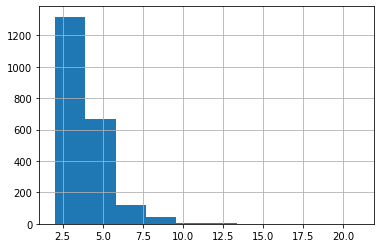

In [37]:
stats['word_count'].hist()

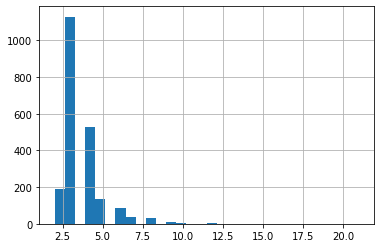

In [38]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [39]:
stats.word_count.value_counts().head()

3    1129
4     529
2     189
5     137
6      84
Name: word_count, dtype: int64

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [40]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [41]:
from urllib import parse

In [43]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc').query

'search=footbal'

In [44]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [45]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [ ]:
# как доставать значения

parsed.netloc

In [46]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [47]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [48]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [49]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [50]:
# проверяем датафрейм
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [51]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


### Как передать в функцию несколько аргументов

In [52]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [54]:
stats['power_up'] = stats.apply(power_up, n=2, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,20.25
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,20.25
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,54.76
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,25.00
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,25.00


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [70]:
def classify(row):
    return 'мрт' not in row.group and '24 часа' in row.text

In [71]:
stats.apply(classify, axis=1).value_counts()

False    2120
True       39
dtype: int64

In [ ]:
stats['мрт' in stats.text].head()

In [57]:
stats.text.apply(lambda x: 'МРТ' in x).head()

0    True
1    True
2    True
3    True
4    True
Name: text, dtype: bool

In [ ]:
stats.apply(lambda x: 'МРТ' in x).head()

In [69]:
len(stats[~stats.apply(lambda row: 'мрт' not in row.group and '24 часа' in row.text, axis=1)])

2120

In [56]:
stats[stats.text.str.contains('МРТ')].head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,20.25
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,20.25
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,54.76
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,25.00
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,25.00


# Группировки

In [72]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [77]:
df_russia.query('country == "Россия"')

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


In [ ]:
"""
"""

In [78]:
df_russia.query("country == 'Россия'")

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


In [79]:
df_russia.query('country == \'Россия\'')

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


In [73]:
df_russia = df[df.country == 'Россия']
df_russia

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


In [74]:
df_china = df[df.country == 'Китай']
df_china

,order_id,country,category,amount
1,2,Китай,Авто,80
2,3,Китай,Электроника,90


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [75]:
df_russia.amount.mean()

110.0

In [76]:
df_russia.amount.max() - df_russia.amount.min()

50

Объединим процесс разбиения на датафреймы

In [80]:
def groupby_function(data):
    return data.count()

In [83]:
df.groupby('country').apply(groupby_function)

country
Китай     10
Россия    50
dtype: int64

Вернемся к статистике рекламных кампаний

In [84]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [85]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2


In [88]:
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,20.25
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,20.25
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,54.76
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,25.00
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,25.00


In [86]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


### Как вернуть столбец из индекса - метод reset_index()

In [89]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,power_up
0,034ada41b6,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2


### К группировке можно применять разные функции такие образом:

In [90]:
obj = stats.groupby('campaign')

In [91]:
type(obj)

pandas.core.groupby.generic.DataFrameGroupBy

In [92]:
obj.max().head()

,group,phrase,effect,ad_id,title,text,link,word_count,power_up
campaign,,,,,,,,,
034ada41b6,в недорого москва мрт,в москве открытого типа адрес мрт -цена,9.0,2428554779,Адрес МРТ открытого типа в Москве,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,7,81.00
03fcaecd1d,сделать мрт сущевский вал,сделать мрт стромынка,6.5,2101705759,Сделайте МРТ на ул. Стромынка!,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,42.25
0697a81555,мрт позвоночника сущевский вал,мрт позвоночника стромынка,5.5,2101706415,МРТ позвоночника на ул. Стромынка,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,30.25
08cdcb57a3,мрт сао,мрт сао -головы -москве -позвоночника -сделать...,7.4,2101705000,МРТ в САО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,7,54.76
0f0ba311fb,сделать мрт октябрьский,сделать мрт новослободская,6.4,2101705726,Сделайте МРТ на Новослободской,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,40.96


In [93]:
obj.mean().head()

,effect,ad_id,word_count,power_up
campaign,,,,
034ada41b6,7.200000,2.428555e+09,6.333333,56.686667
03fcaecd1d,5.250000,2.101706e+09,3.000000,29.125000
0697a81555,4.750000,2.101706e+09,3.000000,23.125000
08cdcb57a3,6.133333,2.101705e+09,3.666667,38.420000
0f0ba311fb,5.400000,2.101706e+09,3.000000,30.160000


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

### Несколько функций в группировках

In [94]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

,min,max
campaign,,
034ada41b6,4.1,9.0
03fcaecd1d,4.0,6.5
0697a81555,4.0,5.5
08cdcb57a3,5.5,7.4
0f0ba311fb,4.4,6.4


In [95]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

effect        power_up
              min  max       mean
campaign                         
034ada41b6    4.1  9.0  56.686667
03fcaecd1d    4.0  6.5  29.125000
0697a81555    4.0  5.5  23.125000
08cdcb57a3    5.5  7.4  38.420000
0f0ba311fb    4.4  6.4  30.160000

### Как обращаться к вложенным столбцам

In [96]:
results['effect']['max'].head()

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
Name: max, dtype: float64

In [97]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
Name: max, dtype: float64

In [98]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

phrase  effect  ad_id  title  text  link  \
group                campaign                                               
1 5 москва мрт тесла 777160ba51       1       1      1      1     1     1   
                     8e77a0e565       1       1      1      1     1     1   
                     f0079349af       1       1      1      1     1     1   
1 градская мрт       7f35591a28       3       3      3      3     3     3   
1 мрт нагатинский    8e77a0e565       1       1      1      1     1     1   

                                 word_count  power_up  
group                campaign                          
1 5 москва мрт тесла 777160ba51           1         1  
                     8e77a0e565           1         1  
                     f0079349af           1         1  
1 градская мрт       7f35591a28           3         3  
1 мрт нагатинский    8e77a0e565           1         1

In [99]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

,,phrase,effect,ad_id,title,text,link,word_count,power_up
group,campaign,,,,,,,,
мрт на алексеевской кулаков переулок 13,7f35591a28,3,3,3,3,3,3,3,3
мрт каширское шоссе,7f35591a28,3,3,3,3,3,3,3,3
мрт кутузовский,7f35591a28,3,3,3,3,3,3,3,3
мрт куркинское шоссе 30,7f35591a28,3,3,3,3,3,3,3,3
мрт куркино,7f35591a28,3,3,3,3,3,3,3,3


### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 